In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

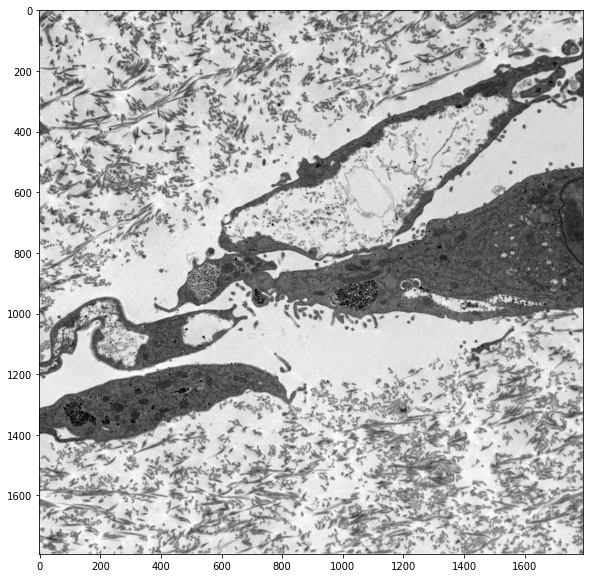

In [153]:
sample_image_file = '208-16 NSMF-I-day 7/208-16 NSMF-I-day 7_008.TIF'
dataset_dir = '/Users/leonyao/Documents/collagen_analysis/dataset'

sample_image_path = f'{dataset_dir}/{sample_image_file}'

sample_img_uncropped = cv2.imread(sample_image_path)
# crop the image to dimension 1792 x 1792
sample_img = sample_img_uncropped[:1793, :, :]
plt.figure(figsize=(10, 10))
# plt.axis('off')
plt.imshow(sample_img)


### Experiment 1: LSD (Line segement detection)

Didn't work because it's depecrated in python

In [111]:
out = []
# gray_image = cv2.normalize(src=sample_img[:, :, 0], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
gray_image = cv2.cvtColor(sample_img, cv2.CV_8UC1)
cv2.LineSegmentDetector.detect(gray_image, out)


TypeError: descriptor 'detect' for 'cv2.LineSegmentDetector' objects doesn't apply to a 'numpy.ndarray' object

### Method 2: HoughLinesP


In [114]:
gray = cv2.cvtColor(sample_img,cv2.COLOR_BGR2GRAY)

kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# plt.figure(figsize=(10, 10))
# plt.axis('off')
# plt.imshow(gray)

(1793, 1792)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


(-0.5, 1791.5, 1792.5, -0.5)

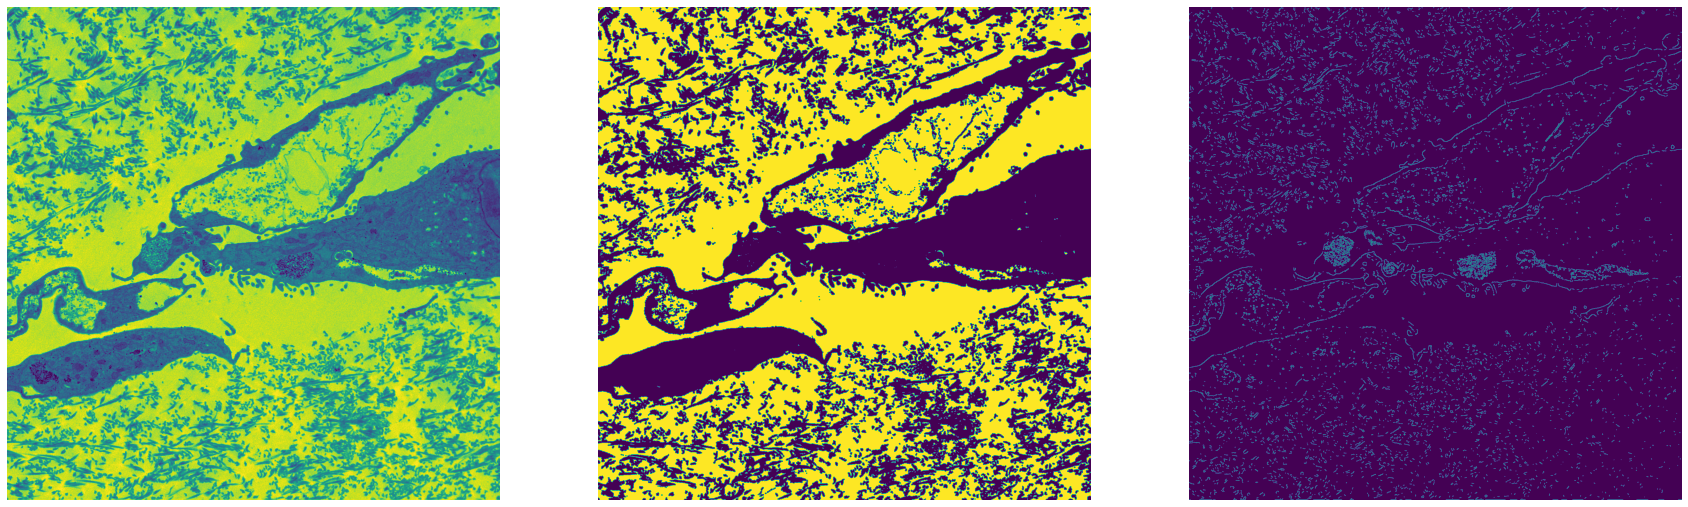

In [198]:
# Canny
low_threshold = 300
high_threshold = 400
edges = cv2.Canny(gray, low_threshold, high_threshold)

# Convert to binary
(thresh, im_bw) = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
binary_img = im_bw

# Erode
eroded = cv2.erode(binary_img, np.ones((3, 3), np.uint8))

print(eroded.shape)
print(eroded)
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.imshow(gray)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges)
plt.axis('off')


In [202]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 10  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(sample_img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0, 0.1), 5)

print(len(lines))

# Draw the lines on the image
lines_edges = cv2.addWeighted(cv2.cvtColor(
    edges, cv2.COLOR_GRAY2RGB), 0.8, line_image, 1, 0)


4169


(-0.5, 1791.5, 1792.5, -0.5)

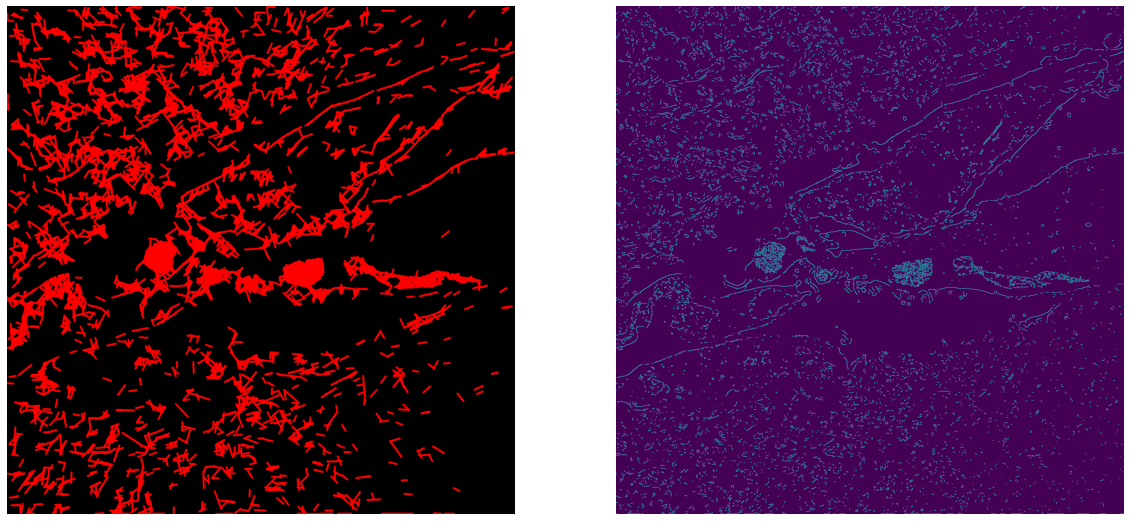

In [206]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(line_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges)
plt.axis('off')


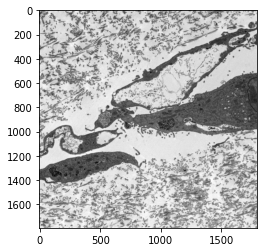

In [134]:
plt.imshow(sample_img)